In [35]:
import numpy as np
from datascience import *

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)


import plotly.graph_objects as go

## Project for CMSC/STAT 118 - Fall Quarter 2019 (due November 12)##

This is not a group project. You may discuss the project with other students but you should code and write the report independently. You should acknowledge any help in writing. The score will be based on:
-  clarity an soundness of the arguments and conclusions; 
-  use of data to back up arguments and analysis quality;  
-  insightfulness of the results;
-  quality of the data vizualization, summaries used, and overall presentation.

The project is inspired by the current Fall Data Challenge from the American Statistical Association. You can find information about it here:
https://thisisstatistics.org/falldatachallenge/

The goal of the ASA Data challenge is to use "statistical and data visualization skills [...] to help find ways to reduce and resolve the homelessness crisis, using HUD’s 2018 Point-in-Time Estimates of Homelessness in the U.S. dataset":

https://www.hudexchange.info/resource/5783/2018-ahar-part-1-pit-estimates-of-homelessness-in-the-us/

The goal of this project is gain insight on homelessness using the tools you have learned so far in this class.

### The Data ###

You can use any data you can find to answer the questions below (note that the website for the ASA challenge contains links to various datasets), but you need to specify the provenance of the data in your report. 

One interesting question is on the city-level homelessness estimates, and we will begin by using data corresponding to "Continuums of Care" (CoC), which are local planning bodies responsible for coordinating the full range of homelessness services in a geographic area, which may cover a city, county, metropolitan area, or an entire state." To this end, we have downloaded the files [2007 - 2018 Point-in-Time Estimates by CoC](https://www.hudexchange.info/resources/documents/2007-2018-HIC-Counts-by-CoC.xlsx) and [2007 - 2018 Housing Inventory Count by CoC](https://www.hudexchange.info/resources/documents/2007-2018-PIT-Counts-by-CoC.xlsx) from the linked resources page. These are Excel files with separate tabs for each year - to make it easier on you, we've aggregated all the years into one file and selected some important columns. 

We saved the results into files that can be downloaded from Canvas. If some of the columns/data require more information, you can find it in the files available from HUD. Note that not all columns of data were available in all years.

You should go back to the original datasets and import more data if they are relevant for your analyses.

#### The next cell that contains code that will allow you to read the data into a tables called "pit_table" and "beds_table". It also shows the first 10 rows. ####

In [3]:
pit_table=Table.read_table('2007-2018-PIT-Counts-by-CoC.csv')
beds_table=Table.read_table('2007-2018-Bed-Counts-by-CoC.csv')
pit_table

CoC Number,CoC Name,Overall Homeless,Sheltered Total Homeless,Unsheltered Homeless,Homeless Individuals,Sheltered Total Homeless Individuals,Unsheltered Homeless Individuals,Homeless People in Families,Sheltered Total Homeless People in Families,Unsheltered Homeless People in Families,Homeless Family Households,Sheltered Total Homeless Family Households,Unsheltered Homeless Family Households,Chronically Homeless Individuals,Sheltered Total Chronically Homeless Individuals,Unsheltered Chronically Homeless Individuals,Year
AK-500,Anchorage CoC,1094,1000,94,814,720,94,280,280,0,87,87,0,163,136,27,2018
AK-501,Alaska Balance of State CoC,922,707,215,620,453,167,302,254,48,106,88,18,160,107,53,2018
AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counties CoC",901,682,219,720,501,219,181,181,0,54,54,0,114,90,24,2018
AL-501,Mobile City & County/Baldwin County CoC,551,318,233,399,183,216,152,135,17,48,42,6,59,11,48,2018
AL-502,Florence/Northwest Alabama CoC,256,234,22,166,144,22,90,90,0,41,41,0,77,63,14,2018
AL-503,Huntsville/North Alabama CoC,424,308,116,336,230,106,88,78,10,30,27,3,107,57,50,2018
AL-504,Montgomery City & County CoC,369,300,69,272,203,69,97,97,0,28,28,0,63,41,22,2018
AL-505,Gadsden/Northeast Alabama CoC,146,86,60,119,59,60,27,27,0,8,8,0,35,7,28,2018
AL-506,Tuscaloosa City & County CoC,57,56,1,35,34,1,22,22,0,8,8,0,4,4,0,2018
AL-507,Alabama Balance of State CoC,730,440,290,523,339,184,207,101,106,63,35,28,13,4,9,2018


In [4]:
# ES=Emergency Shelter, TH=Transitional Housing, SH= Safe Haven
beds_table

Year,CoC Number,"Total Year-Round Beds (ES, TH, SH)",Total Year-Round Beds (ES),Total Year-Round Beds (SH),Total Year-Round Beds (TH)
2018,AK-500,1028,749,0,279
2018,NY-512,150,110,0,40
2018,NY-510,40,21,0,19
2018,NY-508,1055,695,16,344
2018,NY-507,227,178,0,49
2018,NY-505,759,557,0,202
2018,NY-504,50,50,0,0
2018,NY-503,456,304,0,152
2018,NY-501,147,79,0,68
2018,NY-500,700,555,12,133


In [5]:
# the function isnan in the numpy library allows you to count the number of missing values in an array
# you can use it to investigate missing data in each column
sum(np.isnan(beds_table.column('Total Year-Round Beds (SH)')))

462

## The Assignment##

### Report on your findings on homelessness. Can you suggest interventions or policies for  helping solve homelessness? You must submit two files: ###

1. The Jupyter Notebook that contains all the code you use for the analysis. You do not need to submit data you used, but just indicate how you obtained it in the Notebook.

2. A PDF report of your findings. **This report should be at most 4 pages long, with at most two pages of text.** Use data visualization and data summaries to justify your conclusions.

The report should answer at the minimum the following questions:

A.  Are there any temporal patterns in the number of homeless people in Chicago and in Los Angeles?

B.  Are there any spatial patterns in the number of homeless people? (Northern versus Southern states, Midwest versus the Coasts)

C. Are there any patterns in the bed inventory data?

D. How does beds availability affect homelessness?

E. What are possible ways to reduce and resolve the homelessness crisis?

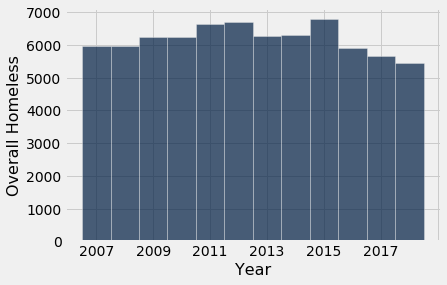

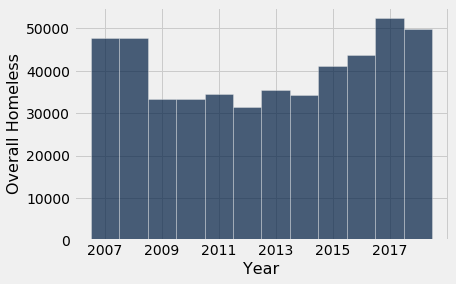

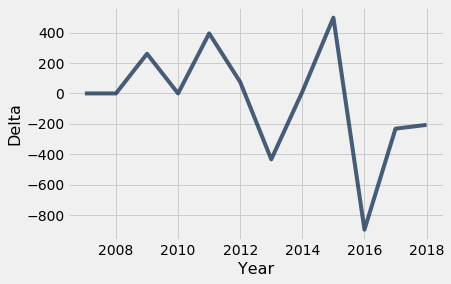

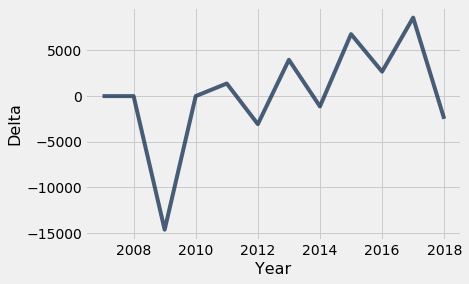

In [6]:
chicago=pit_table.where("CoC Name", "Chicago CoC").sort("Year")
los = pit_table.where("CoC Name", "Los Angeles City & County CoC").sort("Year")
chicago.bar("Year", "Overall Homeless")
los.bar("Year", "Overall Homeless")

chicago_delta = np.insert(np.diff(chicago.column("Overall Homeless")),0,0)
chicago_delta_table = chicago.with_column("Delta", chicago_delta)
chicago_delta_table.plot("Year", "Delta")

los_delta = np.insert(np.diff(los.column("Overall Homeless")),0,0)
los_delta_table = los.with_column("Delta", los_delta)
los_delta_table.plot("Year", "Delta")

In [25]:
def get_state_code(coc_number):
    return coc_number.split("-")[0]
    
states = pit_table.apply(get_state_code, "CoC Number")
new_pit_table = pit_table.with_column("State Code", states)
new_pit_table

pit_summ_by_state_2018 = new_pit_table.where("Year", 2018).group("State Code", sum)
pit_summ_by_state_2018

State Code,CoC Number sum,CoC Name sum,Overall Homeless sum,Sheltered Total Homeless sum,Unsheltered Homeless sum,Homeless Individuals sum,Sheltered Total Homeless Individuals sum,Unsheltered Homeless Individuals sum,Homeless People in Families sum,Sheltered Total Homeless People in Families sum,Unsheltered Homeless People in Families sum,Homeless Family Households sum,Sheltered Total Homeless Family Households sum,Unsheltered Homeless Family Households sum,Chronically Homeless Individuals sum,Sheltered Total Chronically Homeless Individuals sum,Unsheltered Chronically Homeless Individuals sum,Year sum
AK,,,2016,1707,309,1434,1173,261,582,534,48,193,175,18,323,243,80,4036
AL,,,3434,2424,1010,2570,1693,877,864,731,133,280,243,37,472,277,195,16144
AR,,,2712,1455,1257,2280,1081,1199,432,374,58,147,127,20,453,153,300,12108
AZ,,,9865,5799,4066,7259,3354,3905,2606,2445,161,792,745,47,1740,564,1176,6054
CA,,,129972,40429,89543,109008,23635,85373,20964,16794,4170,6702,5372,1330,32668,4857,27811,86774
CO,,,10857,6528,4329,7607,4302,3305,3250,2226,1024,990,689,301,2571,1099,1472,6054
CT,,,3976,3395,581,2280,1699,581,1696,1696,0,553,553,0,298,195,103,4036
DC,,,6904,6304,600,3770,3170,600,3134,3134,0,924,924,0,1586,1286,300,2018
DE,,,1082,989,93,708,615,93,374,374,0,125,125,0,162,143,19,2018
FL,,,31030,17637,13393,21443,10686,10757,9587,6951,2636,2757,2070,687,4543,1237,3306,54486


In [8]:
regions = Table.read_table("https://raw.githubusercontent.com/cphalpert/census-regions/master/us%20census%20bureau%20regions%20and%20divisions.csv")
regions

State,State Code,Region,Division
Alaska,AK,West,Pacific
Alabama,AL,South,East South Central
Arkansas,AR,South,West South Central
Arizona,AZ,West,Mountain
California,CA,West,Pacific
Colorado,CO,West,Mountain
Connecticut,CT,Northeast,New England
District of Columbia,DC,South,South Atlantic
Delaware,DE,South,South Atlantic
Florida,FL,South,South Atlantic


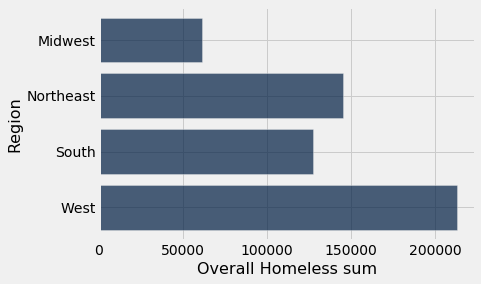

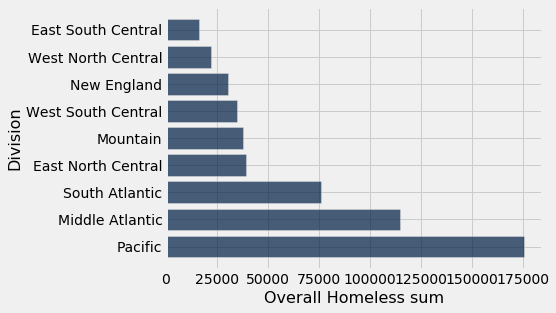

In [32]:
region_homeless =  new_pit_table.where("Year", 2018).join("State Code", regions)

region_sum = region_homeless.group("Region", sum)
division_sum = region_homeless.group("Division", sum)



region_sum.barh("Region", "Overall Homeless sum")
division_sum.sort("Overall Homeless sum").barh("Division", "Overall Homeless sum")

In [36]:
fig = go.Figure(data=[go.Pie(labels=division_sum["Division"], values=division_sum["Overall Homeless sum"])])
fig.show()

In [30]:
fig = go.Figure(data=go.Choropleth(
    locations=pit_summ_by_state_2018['State Code'], # Spatial coordinates
    z = pit_summ_by_state_2018['Overall Homeless sum'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Blues',
    colorbar_title = "Count of Homeless",
))

fig.update_layout(
    title_text = '2018 Sum of Homeless by State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()


In [52]:
pb = pit_table.join(["CoC Number","Year"], beds_table)
pb
pb_sum = pb.group(["CoC Number", "Year"], sum)
pb_sum

CoC Number,Year,CoC Name sum,Overall Homeless sum,Sheltered Total Homeless sum,Unsheltered Homeless sum,Homeless Individuals sum,Sheltered Total Homeless Individuals sum,Unsheltered Homeless Individuals sum,Homeless People in Families sum,Sheltered Total Homeless People in Families sum,Unsheltered Homeless People in Families sum,Homeless Family Households sum,Sheltered Total Homeless Family Households sum,Unsheltered Homeless Family Households sum,Chronically Homeless Individuals sum,Sheltered Total Chronically Homeless Individuals sum,Unsheltered Chronically Homeless Individuals sum,"Total Year-Round Beds (ES, TH, SH) sum",Total Year-Round Beds (ES) sum,Total Year-Round Beds (SH) sum,Total Year-Round Beds (TH) sum
AK-500,2007,,974,842,132,696,589,107,278,253,25,93,85,8,224,187,37,nan,500,nan,384
AK-500,2008,,1023,921,102,695,596,99,328,325,3,84,83,1,300,239,61,899,540,0,359
AK-500,2009,,1267,1110,157,821,689,132,446,421,25,133,124,9,198,152,46,877,548,0,329
AK-500,2010,,1231,1113,118,740,633,107,491,480,11,151,147,4,56,43,13,990,548,0,442
AK-500,2011,,1223,1082,141,794,677,117,429,405,24,138,131,7,112,94,18,1056,579,0,477
AK-500,2012,,1147,1097,50,791,756,35,356,341,15,126,122,4,113,108,5,1001,571,0,430
AK-500,2013,,1122,1070,52,844,792,52,278,278,0,87,87,0,83,62,21,1015,574,0,441
AK-500,2014,,1023,970,53,736,688,48,287,282,5,102,100,2,94,56,38,988,606,0,382
AK-500,2015,,1208,1029,179,837,679,158,371,350,21,101,94,7,106,27,79,1019,603,0,416
AK-500,2016,,1105,865,240,905,665,240,200,200,0,69,69,0,48,46,2,1007,553,0,454


In [39]:
states = beds_table.apply(get_state_code, "CoC Number")
new_beds_table = beds_table.with_column("State Code", states)
new_beds_table

beds_summ_by_state_2018 = new_beds_table.where("Year", 2018).group("State Code", sum)
beds_summ_by_state_2018

State Code,Year sum,CoC Number sum,"Total Year-Round Beds (ES, TH, SH) sum",Total Year-Round Beds (ES) sum,Total Year-Round Beds (SH) sum,Total Year-Round Beds (TH) sum
AK,4036,,1940,1398,0,542
AL,16144,,3188,2114,34,1040
AR,12108,,2362,1738,0,624
AZ,6054,,6683,4058,37,2588
CA,86774,,43548,27246,298,16004
CO,6054,,7532,4425,25,3082
CT,4036,,3417,2835,0,582
DC,2018,,6721,5268,0,1453
DE,2018,,1122,629,5,488
FL,54486,,19554,12424,182,6948


In [40]:
fig = go.Figure(data=go.Choropleth(
    locations=beds_summ_by_state_2018['State Code'], # Spatial coordinates
    z = beds_summ_by_state_2018['Total Year-Round Beds (ES, TH, SH) sum'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Blues',
    colorbar_title = "Count of Beds",
))

fig.update_layout(
    title_text = '2018 Beds by State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()


In [54]:
beds_pits =beds_summ_by_state_2018.join("State Code",pit_summ_by_state_2018)
beds_pits = beds_pits.select("State Code", "Total Year-Round Beds (ES, TH, SH) sum", "Overall Homeless sum")

gap = beds_pits["Overall Homeless sum"] - beds_pits["Total Year-Round Beds (ES, TH, SH) sum"] 
gap_percent = gap/beds_pits["Overall Homeless sum"] * 100
beds_pits=beds_pits.with_column("Gap", gap)

beds_pits=beds_pits.with_column("Gap Percent", gap_percent)
beds_pits

fig = go.Figure(data=go.Choropleth(
    locations=beds_summ_by_state_2018['State Code'], # Spatial coordinates
    z = beds_pits['Gap Percent'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Blues',
    colorbar_title = "Count of Beds",
))

fig.update_layout(
    title_text = '2018 Beds Gap by State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()


In [55]:
beds_pits

State Code,"Total Year-Round Beds (ES, TH, SH) sum",Overall Homeless sum,Gap,Gap Percent
AK,1940,2016,76,3.76984
AL,3188,3434,246,7.16366
AR,2362,2712,350,12.9056
AZ,6683,9865,3182,32.2554
CA,43548,129972,86424,66.4943
CO,7532,10857,3325,30.6254
CT,3417,3976,559,14.0594
DC,6721,6904,183,2.65064
DE,1122,1082,-40,-3.69686
FL,19554,31030,11476,36.9836


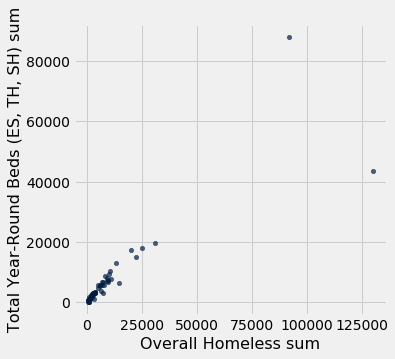

In [56]:
beds_pits.scatter("Overall Homeless sum", "Total Year-Round Beds (ES, TH, SH) sum")

Year,CoC Number,"Total Year-Round Beds (ES, TH, SH)",Total Year-Round Beds (ES),Total Year-Round Beds (SH),Total Year-Round Beds (TH)
2018,Total,389622,286203,2390,101029
2017,Total,399439,277537,1653,120249
2016,Total,411285,264629,1907,144749
2015,Total,426267,264440,2043,159784
2014,Total,424880,249497,2159,173224
2013,Total,426231,238708,2191,185332


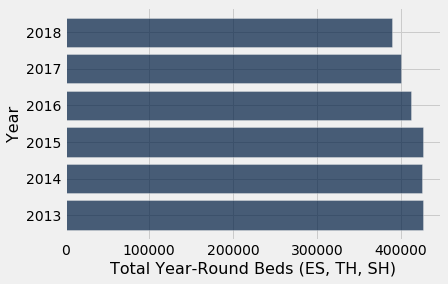

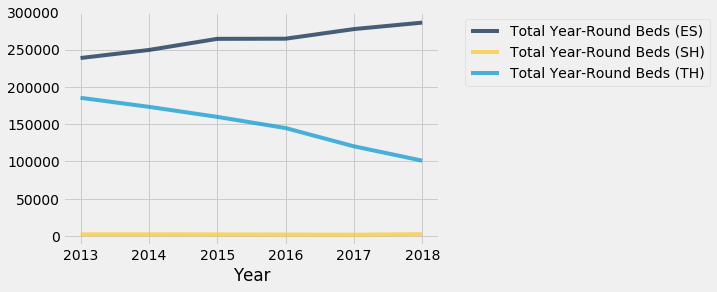

In [73]:
b_2018 = beds_table.where("CoC Number", "Total").where("Total Year-Round Beds (ES, TH, SH)", are.above(0))

b_2018.barh("Year", "Total Year-Round Beds (ES, TH, SH)")
b_2018.select("Year","Total Year-Round Beds (ES)", "Total Year-Round Beds (SH)", "Total Year-Round Beds (TH)").plot("Year")

b_2018